In [2]:
# customary imports:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.io
import h5py
from pathlib import Path
import cv2
from scipy import ndimage
print('tensorflow version: ' + tf.__version__)

tensorflow version: 2.0.0


### 1.Load data from local storage



In [2]:
df = pd.read_excel('labels.xlsx')
df = df.drop_duplicates(subset = "subject")
label = df['label'].values
subjects = df['subject'].values
print("number of subjects: ", len(subjects))


number of subjects:  91


In [3]:
# Search all data with _highBW.mat and save to files
path = os.path.abspath("/Volumes/SeagateExternal/Patients")
print("path directory:", path)
files = []
paths=[]
filelabels = []
# Find file with _ute.ni 

for r, d, f in os.walk(path):
    d.sort()
    for file in f:
        if ('.mat' in file):
            index=-3;
            name=[];
            find_=False;
            #print(r)
            while(not find_):
                if(file[index]=='.'):
                    find_= True;
                index=index-1;
                if(find_):
                    name.append(file[0:index+1])
            if(name in subjects):
                files.append(name)
                paths.append(r)
                filelabels.append(label[list(subjects).index(name[0])])
                
#removes duplicates
temp1, temp2, temp3 = [],[],[]
for i in range(len(files)):
    if(files[i] not in temp1):
        temp1.append(files[i])
        temp2.append(paths[i])
        temp3.append(filelabels[i])
        
files = temp1
paths = temp2
filelabels = temp3



print("number of patients:", len(filelabels))
print(filelabels);

path directory: /Volumes/SeagateExternal/Patients
number of patients: 91
['IPF', 'IPF', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'IPF', 'IPF', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'NSIP', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF', 'IPF']


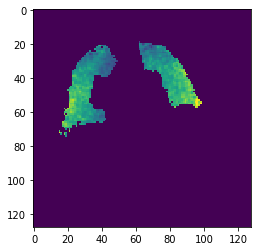

In [4]:
images = []
labels = []
def get_slice_index(mask):
    #assume in axial position
    idx1, idx2 = -1, -1
    area = 400
    for i in range(mask.shape[2]):
        if(sum(sum(mask[:,:,i]))>=area and idx1== -1):
            idx1 = i
    
        if(sum(sum(mask[:,:,mask.shape[2]-i-1]))>=area and idx2== -1):
            idx2 = mask.shape[2]-i-1
            
    center = int(np.abs(idx2-idx1)/2+idx1)
    print(center)
    idx1 = center - 5
    idx2 = center + 5
    return (idx1,idx2)

nslices = 10
for num_file in range(len(files[0:])):
# load data  
    current_path = paths[num_file]+'/'+str(files[num_file][0])+'.mat';
    print(current_path)
    mat = scipy.io.loadmat(current_path)
    bar2gas = ndimage.rotate(mat['bar2gas'],angle = 90, axes = (0,2)) 
    mask_reg = ndimage.rotate(mat['mask_reg'],angle = 90, axes = (0,2))
    rbc2gas = ndimage.rotate(mat['rbc2gas'],angle = 90, axes =(0,2))
    gas = ndimage.rotate(np.abs(mat['gas_highreso']),angle = 90, axes =(0,2))

    
    idx1, idx2 = get_slice_index(mask_reg)
    for ij in np.linspace(idx1,idx2, nslices):
        ij = int(ij)
        bar2gas_current = np.abs(bar2gas[:,:,ij])
        rbc2gas_current = np.abs(rbc2gas[:,:,ij])
        gas_current = np.abs(gas[:,:,ij])
        mask_current = mask_reg[:,:,ij]
        if(len(images)==0):
            images = np.expand_dims(np.expand_dims(np.array(rbc2gas_current, dtype= float)/255, axis= 0),axis = -1)
            images = np.append(images,np.expand_dims(np.expand_dims(np.array(bar2gas_current, dtype= float)/255, axis= 0),axis = -1),axis = -1)
            images = np.append(images,np.expand_dims(np.expand_dims(np.array(np.abs(gas_current), dtype= float)/255, axis= 0),axis = -1),axis = -1)

        else:
            rbc2d = np.expand_dims(np.expand_dims(np.array(rbc2gas_current, dtype= float)/255, axis= 0),axis = -1)
            bar2d = np.expand_dims(np.expand_dims(np.array(bar2gas_current, dtype= float)/255, axis= 0),axis = -1)
            gas2d = np.expand_dims(np.expand_dims(np.array(np.abs(gas_current), dtype= float)/255, axis= 0),axis = -1)
            image = np.append(rbc2d,bar2d, axis = -1)
            image = np.append(image,gas2d,axis=-1)
            images = np.append(images, image, axis = 0)
        labels.append(filelabels[num_file]) 

print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")



/Volumes/SeagateExternal/Patients/002-011/Gas_Exchange/003023_highBW.mat
47
/Volumes/SeagateExternal/Patients/002-011/Gas_Exchange/003023_hrep.mat
45
/Volumes/SeagateExternal/Patients/002-112/Gas_Exchange/002112_highBW.mat
44
/Volumes/SeagateExternal/Patients/002-113/Gas_Exchange/002113_highBW.mat
47
/Volumes/SeagateExternal/Patients/002-114/Gas_Exchange/002114_highBW.mat
43
/Volumes/SeagateExternal/Patients/002-115/Gas_Exchange/002115_highBW.mat
49
/Volumes/SeagateExternal/Patients/002-117/Gas_Exchange/002117_highBW.mat
49
/Volumes/SeagateExternal/Patients/002-118/Gas_Exchange/002118_highBW.mat
47
/Volumes/SeagateExternal/Patients/002-119/Gas_Exchange/002119_highBW.mat
40
/Volumes/SeagateExternal/Patients/002-120/Gas_Exchange/002120_highBW.mat
55
/Volumes/SeagateExternal/Patients/002-121/Gas_Exchange/002121_highBW.mat
52
/Volumes/SeagateExternal/Patients/002-122/Gas_Exchange/002122_highBW.mat
49
/Volumes/SeagateExternal/Patients/002-123/Gas_Exchange/002123_highBW.mat
54
/Volumes/Seaga

In [5]:
#normalize
for i in range(images.shape[0]):
    for j in range(images.shape[3]):
        images[i,:,:,j] = images[i,:,:,j]/np.max(images[i,:,:,j])

In [7]:

hdf5_dir = Path('/Users/Junlan/OneDrive - Duke University/Duke_Coursework/Spring2020Courses/BME590-03/final_project/h5/')
def store_many_hdf5(images, labels):
    """ Stores an array of images to HDF5.
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    num_images = len(images)

    # Create a new HDF5 file
    try:
        file = h5py.File(hdf5_dir / f"{num_images}_many.h5", "w")
    except:
        os.remove(hdf5_dir / f"{num_images}_many.h5")
        file = h5py.File(hdf5_dir / f"{num_images}_many.h5", "w")

    # Create a dataset in the file
    try:
        dataset = file.create_dataset(
            "images", np.shape(images), h5py.h5t.IEEE_F32LE, data=images
        )
    except:
        print("closing file")
        file.close()
    try:
        meta_set = file.create_dataset(
            "labels", np.shape(labels), h5py.h5t.STD_U32BE, data=labels
        )
    except:
        print("closing file")
        file.close()
    file.close()
    

labels_bin = np.array(labels) == 'IPF' #converts string to boolean value 1 if NSIP 0 if IPF

store_many_hdf5(images,labels_bin)
print("Stored imageset to hdf5")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")
print(f" - np.shape(labels_bin)     {np.shape(labels_bin)}")

Stored imageset to hdf5
 - np.shape(images)     (910, 128, 128, 3)
 - np.shape(labels)     (910,)
 - np.shape(labels_bin)     (910,)


## Import the Data

shape of image batch:  (910, 128, 128, 3)
shape of labels:  (910,)
number of IPF images:  360
number of NSIP images:  550


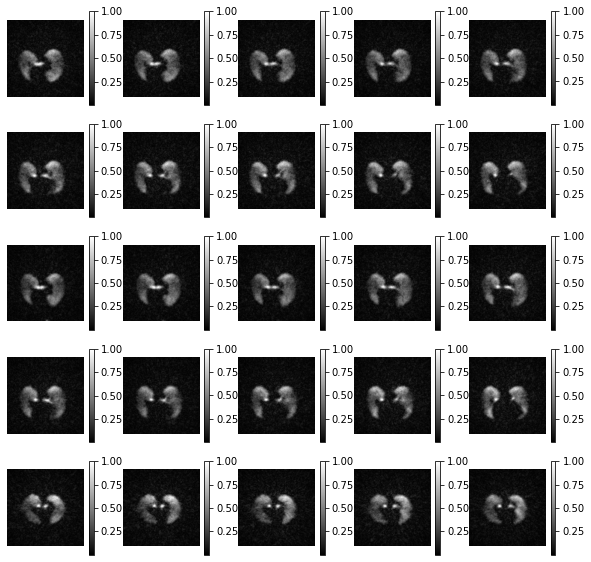

In [3]:



# test if if you can read h5 file
f = h5py.File('h5/910_many.h5','r+')
X = np.asarray(f['images'])
y = np.asarray(f['labels'])
print("shape of image batch: ", X.shape)
print("shape of labels: ",y.shape)

print("number of IPF images: ", sum(np.array(y)==0))
print("number of NSIP images: ", sum(np.array(y)==1))

def plot_examples(batch):
    import random 
    np.random.seed(42)
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        #plt.imshow(batch[random.randint(0,batch.shape[0]-1), :, :, 2],cmap='gray')
        plt.imshow(batch[i, :, :, 2],cmap='gray')
        plt.colorbar()
        plt.axis('off')
    plt.show()

plot_examples(X)

if f.__bool__():
       f.close()
        


## 3. Develop basic CNN model for classification

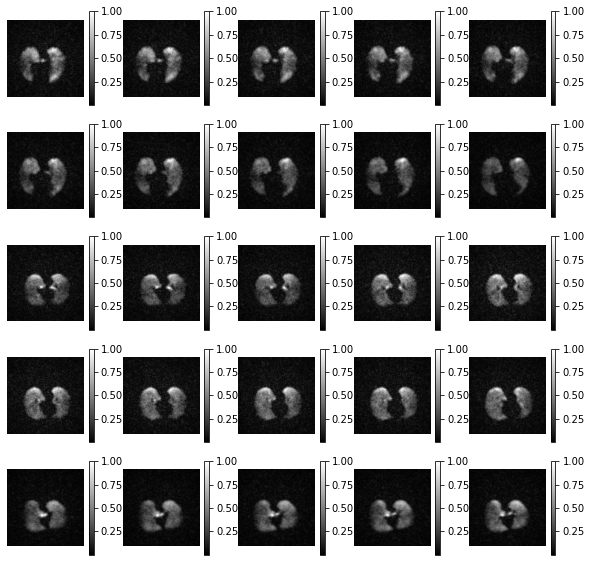

In [3]:
# generate train and test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
nslices = 10
X_resize = np.reshape(X, newshape = [int(X.shape[0]/nslices), nslices, 128, 128, 3])
y_resize = np.reshape(y, newshape = [int(y.shape[0]/nslices), nslices])


X_train, X_test, y_train, y_test = train_test_split(X_resize, y_resize, test_size=0.2, random_state=0)

X_train = np.reshape(X_train, newshape = [X_train.shape[0]*X_train.shape[1], 128, 128, 3])
X_test = np.reshape(X_test, newshape = [X_test.shape[0]*X_test.shape[1], 128, 128, 3])
y_train = np.reshape(y_train, newshape = [y_train.shape[0]*y_train.shape[1]])
y_test = np.reshape(y_test, newshape = [y_test.shape[0]*y_test.shape[1]])

plot_examples(X_train)

In [5]:
print(X_train[0,:,:,:].shape)

(128, 128, 3)


## Augment the data

In [9]:

num_examples = 10

def augment(X, y, n_images):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        width_shift_range=[-10,10],
        height_shift_range=[-10,10],
        rotation_range= 3,
        shear_range= 0.1,
        brightness_range=[0.9,1.0],
        zoom_range=[0.95,1.0])
    
    batch_size = 32
    datagen.fit(X_train)
    
    it = datagen.flow(X, y, batch_size=batch_size)
    
    X_augmented, y_augmented = [],[]
    for i in range(n_images):
        batch = it.next()
        image = batch[0].astype('float32')
        label = batch[1]
        if(len(y_augmented) == 0):
            X_augmented = image
            y_augmented = label
        else:    
            X_augmented = np.append(X_augmented, image ,axis = 0)
            y_augmented = np.append(y_augmented, label)
    print("augmented image batch shape:", X_augmented.shape)  
    return X_augmented, y_augmented


X_train_augmented, y_train_augmented = augment(X_train,y_train, num_examples)
  
plot_examples(X_train_augmented)

NameError: name 'X_train' is not defined

In [7]:
examples_train = 100
examples_test = 10
X_train_augmented, y_train_augmented = augment(X_train,y_train, examples_train)
X_test_augmented, y_test_augmented = augment(X_train,y_train, examples_test)



augmented image batch shape: (3136, 128, 128, 3)
augmented image batch shape: (320, 128, 128, 3)


### Define the CNN

In [14]:

# simple CNN from classwork
class CNN_1(tf.keras.Model):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='block1_conv1',activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='block1_conv2', activation='relu')
        self.maxpool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None, name='block1_pool', padding="valid")
        self.conv3 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='block2_conv1',activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='block2_conv2',activation='relu')
        self.maxpool2 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None, name='block2_pool', padding="valid")
        self.batchnorm = tf.keras.layers.BatchNormalization()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(units=256, activation='relu', name='fc1')
        self.d2 = tf.keras.layers.Dense(units = 2, activation='softmax', name='fc2')

    def call(self, x):
        x = self.conv1 (x)
        x = self.conv2(x)
        x = self.maxpool1 (x)
        x = self.batchnorm (x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.maxpool2 (x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)
    def model(self):
        x = tf.keras.layers.Input(shape)



### Basic custom model

In [15]:
model_1 = CNN_1()
model_1.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])


hist_1 = model_1.fit(X_train, y_train,
              epochs=5,
              batch_size=32,
              validation_data=(X_test, y_test))
print(model_1.summary())
model_1.evaluate(X_test_augmented,  y_test_augmented, verbose=2)

Train on 720 samples, validate on 190 samples
Epoch 1/5
720/720 [==============================] - 17s 23ms/sample - loss: 1.1055 - accuracy: 0.6778 - val_loss: 0.6768 - val_accuracy: 0.7263
Epoch 2/5
720/720 [==============================] - 15s 21ms/sample - loss: 0.1558 - accuracy: 0.9361 - val_loss: 0.6112 - val_accuracy: 0.7421
Epoch 3/5
720/720 [==============================] - 15s 21ms/sample - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.5912 - val_accuracy: 0.7421
Epoch 4/5
720/720 [==============================] - 15s 21ms/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.5831 - val_accuracy: 0.7368
Epoch 5/5
720/720 [==============================] - 15s 21ms/sample - loss: 8.3324e-04 - accuracy: 1.0000 - val_loss: 0.5671 - val_accuracy: 0.7526
Model: "cnn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        multiple                  896       
____________

NameError: name 'X_test_augmented' is not defined

### Only 1 Channel

In [185]:
#model with only channel 1
model_rbc = CNN_1()
model_rbc.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

hist_rbc = model_rbc.fit(np.expand_dims(X_train[:,:,:,0],axis = -1), y_train,
              epochs=2,
              batch_size=32,
              validation_data=(np.expand_dims(X_test[:,:,:,0],axis = -1), y_test))

print(model_rbc.summary())
model_rbc.evaluate(np.expand_dims(X_test_augmented[:,:,:,0],axis = -1), y_test_augmented, verbose=2)

Train on 720 samples, validate on 190 samples
Epoch 1/2
720/720 [==============================] - 18s 25ms/sample - loss: 0.6210 - accuracy: 0.7597 - val_loss: 0.6743 - val_accuracy: 0.6684
Epoch 2/2
720/720 [==============================] - 16s 22ms/sample - loss: 0.0969 - accuracy: 0.9639 - val_loss: 0.6246 - val_accuracy: 0.7263
Model: "cnn_1_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        multiple                  320       
_________________________________________________________________
block1_conv2 (Conv2D)        multiple                  9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block2_conv1 (Conv2D)        multiple                  9248      
____________________________________________________

[27.562700843811037, 0.421875]

In [186]:
#evaluate the model with only the mask (binary value)

x_test_mask = np.expand_dims(X_test[:,:,:,0]>.01,axis = -1)
print(x_test_mask.shape)
test_loss, test_acc = model_rbc.evaluate(x_test_mask,  y_test, verbose=2)
test_loss, test_acc = model_rbc.evaluate(np.expand_dims(X_test[:,:,:,0],axis = -1),  y_test, verbose=2)

(190, 128, 128, 1)
190/1 - 1s - loss: 0.5770 - accuracy: 0.7684
190/1 - 1s - loss: 0.6329 - accuracy: 0.7263


### Train with the augmented model

In [187]:

model_augment = CNN_1()
model_augment.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

model_augment.fit(X_train_augmented, y_train_augmented,
              epochs=2,
              batch_size=32,
              validation_data=(X_test, y_test))

print(model_augment.summary())
model_augment.evaluate(X_test_augmented,  y_test_augmented, verbose=2)

Train on 3136 samples, validate on 190 samples
Epoch 1/2
3136/3136 [==============================] - 70s 22ms/sample - loss: 1.3976 - accuracy: 0.7411 - val_loss: 0.7063 - val_accuracy: 0.4737
Epoch 2/2
3136/3136 [==============================] - 62s 20ms/sample - loss: 0.1076 - accuracy: 0.9678 - val_loss: 0.7506 - val_accuracy: 0.4737
Model: "cnn_1_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        multiple                  896       
_________________________________________________________________
block1_conv2 (Conv2D)        multiple                  9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block2_conv1 (Conv2D)        multiple                  9248      
_______________________________________________

[0.04986739307641983, 0.98125]

### Train with augmented model with 1 channel

In [128]:
#model with only channel 1 and data augmentation
model_rbc_augment = CNN_1()
model_rbc_augment.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

model_rbc_augment.fit(np.expand_dims(X_train_augmented[:,:,:,0],axis = -1), y_train_augmented,
              epochs=2,
              batch_size=32,
              validation_data=(np.expand_dims(X_test_augmented[:,:,:,0],axis = -1), y_test_augmented))

print(model_rbc_augment.summary())


test_loss, test_acc = model_rbc_augment.evaluate(np.expand_dims(X_test_augmented[:,:,:,0],axis = -1)>.01,
                                                 y_test_augmented, verbose=2) 

Train on 3136 samples, validate on 320 samples
Epoch 1/2
3136/3136 [==============================] - 129s 41ms/sample - loss: 0.7130 - accuracy: 0.7959 - val_loss: 0.1735 - val_accuracy: 0.9312
Epoch 2/2
3136/3136 [==============================] - 120s 38ms/sample - loss: 0.0543 - accuracy: 0.9805 - val_loss: 0.0961 - val_accuracy: 0.9750
Model: "cnn_1_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           multiple                  832       
_________________________________________________________________
conv2d_69 (Conv2D)           multiple                  25632     
_________________________________________________________________
max_pooling2d_34 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_70 (Conv2D)           multiple                  9248      
_____________________________________________

### visualization break

In [175]:
def plot_examples_filters(batch):
    import random 
    fig = plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(batch[0, :, :, i],cmap='gray')
        plt.axis('off')
    plt.show()
    
    fig.savefig('output.png')


(190, 128, 128, 32)


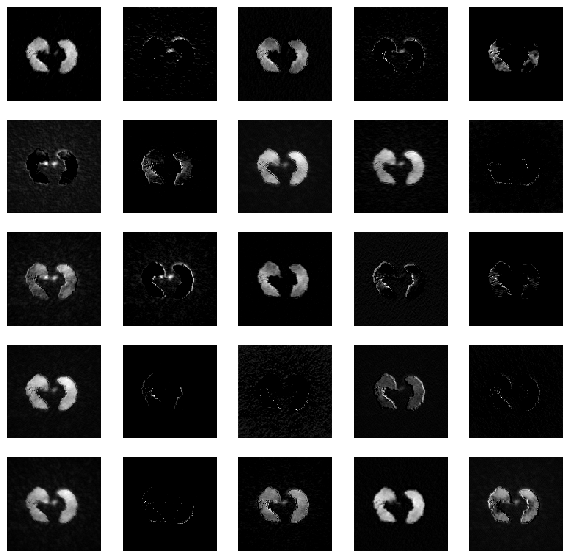

In [188]:
#print output of the first filter from augmented model
block1_conv1 = model_augment.get_layer(name = 'block1_conv1')

block1_output = block1_conv1(X_test)



print(block1_output.shape)
plot_examples_filters(block1_output)

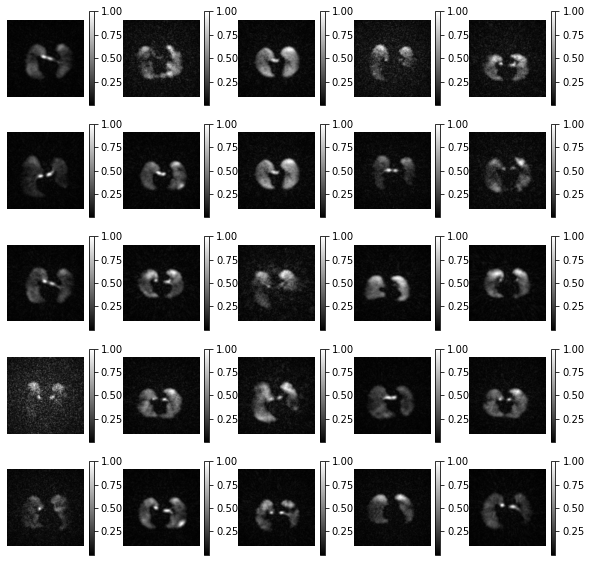

In [42]:
plot_examples(X_train)


## 4. Add a simple physical layer of optimizing 3 channels

In [38]:
# Try making a physical layer inherit tf.keras.layers.Layer. Define the physical layer
class PhysicalLayer(tf.keras.layers.Layer):
    def __init__(self):
        #might need to pass input shape as an arg 
        super().__init__()
        self._name = "physical_layer"
        self.channel_weight = tf.Variable(0.5*tf.ones([3]), name = 'channel_weights', trainable = True, constraint = lambda t: tf.clip_by_value(t, 0, 1))
        #self.channel_weight = tf.Variable(tf.ones([3]), name = 'channel weights', trainable = True, constraint = tf.keras.constraints.UnitNorm(axis=0))
    def build(self, input_shape):
        return
        
    def call(self, x_batch):
        print(x_batch.shape)
        #image = tf.einsum('ijkl,l->ijkl', x_batch, self.channel_weight)
        image = tf.einsum('ijkl,l->ijk', x_batch, self.channel_weight)
        image = tf.expand_dims(image, axis = -1)
        return image



In [39]:
class CNN_2(tf.keras.Model):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.physical = PhysicalLayer()
        self.conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='block1_conv1',activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='block1_conv2', activation='relu')
        self.maxpool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None, name='block1_pool', padding="valid")
        self.conv3 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='block2_conv1',activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='block2_conv2',activation='relu')
        self.maxpool2 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None, name='block2_pool', padding="valid")
        self.batchnorm = tf.keras.layers.BatchNormalization()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(units=256, activation='relu', name='fc1')
        self.d2 = tf.keras.layers.Dense(2, activation='softmax', name='fc2')
    def call(self, x):
        x = self.physical(x)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.maxpool1 (x)
        x = self.batchnorm (x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.maxpool2 (x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

model_2 = CNN_2()
model_2.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])
hist_2 = model_2.fit(X_train, y_train,
              epochs= 5,
              batch_size=32,
              validation_data=(X_test, y_test))
print(model_2.summary())

model_2.evaluate(X_test_augmented,  y_test_augmented, verbose=2)

(None, 128, 128, 3)
(None, 128, 128, 1)
Train on 720 samples, validate on 190 samples
Epoch 1/5
(None, 128, 128, 3)
(None, 128, 128, 1)
(None, 128, 128, 3)
(None, 128, 128, 1)
704/720 [============================>.] - ETA: 0s - loss: 1.1439 - accuracy: 0.6619(None, 128, 128, 3)
(None, 128, 128, 1)
720/720 [==============================] - 16s 23ms/sample - loss: 1.1285 - accuracy: 0.6653 - val_loss: 0.6839 - val_accuracy: 0.6842
Epoch 2/5
720/720 [==============================] - 15s 21ms/sample - loss: 0.1928 - accuracy: 0.9278 - val_loss: 0.6580 - val_accuracy: 0.5632
Epoch 3/5
720/720 [==============================] - 17s 24ms/sample - loss: 0.0274 - accuracy: 0.9944 - val_loss: 0.6673 - val_accuracy: 0.5947
Epoch 4/5
720/720 [==============================] - 15s 21ms/sample - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.6246 - val_accuracy: 0.6895
Epoch 5/5
720/720 [==============================] - 15s 21ms/sample - loss: 0.0116 - accuracy: 0.9958 - val_loss: 0.6212 - val_ac

[82.0170726776123, 0.546875]

In [56]:
f_layer = model_2.get_layer(name='physical_layer')
print("Model coefficients",np.asarray(f_layer.channel_weight))


Model coefficients <tf.Variable 'channel_weights:0' shape=(3,) dtype=float32, numpy=array([0.4929384 , 0.49671784, 0.4916004 ], dtype=float32)>
(None, 128, 128, 3)
(None, 128, 128, 1)
[[1. 0.]]


## Transfer learning with VGG16

In [8]:
IMG_SHAPE = (128, 128, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
print(base_model.summary())
feature_batch = base_model(X_train)
print(feature_batch.shape)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [11]:
base_model.trainable = False #leave all layers in base_model frozen
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

model_vgg16 = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])


model_vgg16.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model_vgg16.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [15]:
loss0,accuracy0 = model_vgg16.evaluate(X_test,y_test, verbose = 2)

initial_epochs = 5
history_vgg16 = model_vgg16.fit(X_train_augmented,y_train_augmented, 
                    epochs=initial_epochs, validation_data=(X_test, y_test))

190/1 - 10s - loss: 0.6863 - accuracy: 0.4737
Train on 3136 samples, validate on 190 samples
Epoch 1/5
3136/3136 [==============================] - 159s 51ms/sample - loss: 0.2689 - accuracy: 0.8756 - val_loss: 0.6909 - val_accuracy: 0.4737
Epoch 2/5
3136/3136 [==============================] - 168s 53ms/sample - loss: 0.2156 - accuracy: 0.9123 - val_loss: 0.7001 - val_accuracy: 0.4737
Epoch 3/5
3136/3136 [==============================] - 172s 55ms/sample - loss: 0.1870 - accuracy: 0.9263 - val_loss: 0.7094 - val_accuracy: 0.4737
Epoch 4/5
3136/3136 [==============================] - 158s 50ms/sample - loss: 0.1606 - accuracy: 0.9416 - val_loss: 0.7183 - val_accuracy: 0.4737
Epoch 5/5
3136/3136 [==============================] - 173s 55ms/sample - loss: 0.1417 - accuracy: 0.9512 - val_loss: 0.7274 - val_accuracy: 0.4737


In [16]:
loss0, accuracy0 = model_vgg16.evaluate(X_test_augmented,y_test_augmented, verbose = 2)

320/1 - 15s - loss: 0.1170 - accuracy: 0.9563


In [57]:
print(model_vgg16.predict(image))

[[-4.410674]]


(190, 128, 128, 64)


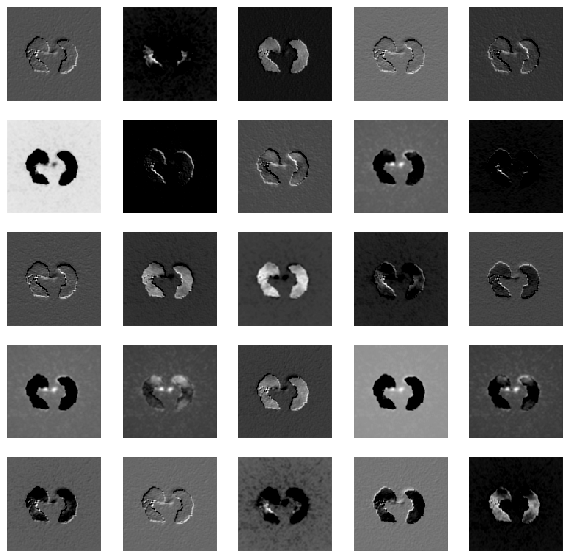

In [174]:
block1_conv1 = model_vgg16.get_layer(name='vgg16').get_layer(name = 'block1_conv1')

block1_output = block1_conv1(X_test)

print(block1_output.shape)
plot_examples_filters(block1_output)

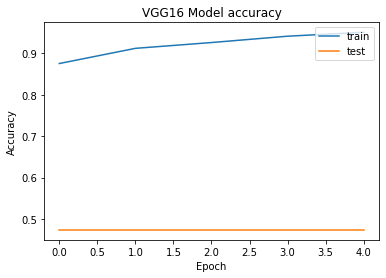

In [21]:
#plot training curve

plt.plot(model_vgg16.history.history['accuracy'])
plt.plot(model_vgg16.history.history['val_accuracy'])
plt.title("VGG16 Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right")
plt.savefig('vgg16training.png')
plt.show()


## Use Grad-CAM to visualize heatmap of important features

In [6]:
import cv2 

class GradCAM:
    def __init__(self, model, classIdx, layerName = None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()
    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
    def compute_heatmap(self, image, eps=1e-8):
        from tensorflow.keras.models import Model
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,
                self.model.output])
        
        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)
        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap
    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [25]:
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
import imutils
# initialize the model to be VGG16

#model = tf.keras.applications.VGG16(include_top=True, weights='imagenet')
model = model
# orig = cv2.imread('test_images/lung.png')
# image = preprocess_input(orig)
# image = cv2.resize(image,(128,128))
# image = np.expand_dims(image,axis=0)
image = X_test[20,:,:,:]
image = np.expand_dims(image,axis=0)

print(np.max(orig))

preds = model.predict(image)
i = np.argmax(preds[0])
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, image, alpha=0.5)

cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
#cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])
output = imutils.resize(output, height=700)
plt.figure(figsize=(20,10))
plt.imshow(output)


AttributeError: module 'cv2.cv2' has no attribute 'applyColormap'

## Repeat above with time distributed layer

In [5]:
input_image = tf.keras.layers.Input(shape = (128,128,3)) # Input layer, shape given as HWC

out = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(input_image)
out = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=2, padding='same', activation='relu')(out)
out = tf.keras.layers.BatchNormalization() (out)
out = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=2, padding='same', activation='relu')(out)
flat = tf.keras.layers.Flatten() (out)
b_norm = tf.keras.layers.BatchNormalization() (flat)
dense1 = tf.keras.layers.Dense(units=256, activation='relu')(b_norm)
dense2 = tf.keras.layers.Dense(units = 2, activation='softmax') (dense1)
  
# Make a model by providing the input layer and output layer
model = tf.keras.models.Model(input_image, dense2)

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])



print(model.summary())

hist_1 = model.fit(X_train, y_train,
              epochs=5,
              batch_size=32,
              validation_data=(X_test, y_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        25632     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0   

In [ ]:
IMG_SHAPE = (128, 128, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
print(base_model.summary())
feature_batch = base_model(X_train)
print(feature_batch.shape)

## Transfer learning with MobileNetV2